In [191]:
from google.colab import files
uploaded = files.upload()

In [192]:
import pandas as pd
df = pd.read_csv('vgames2.csv', index_col='Name').drop('Unnamed: 0', axis = 1)
df.head()

,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,,,,
Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04


In [193]:
df.isnull().sum(),df.dtypes, df.shape

(Platform         0
 Year           271
 Genre           50
 Publisher       58
 NA_Sales         0
 EU_Sales         0
 JP_Sales         0
 Other_Sales      0
 dtype: int64, Platform        object
 Year           float64
 Genre           object
 Publisher       object
 NA_Sales        object
 EU_Sales        object
 JP_Sales        object
 Other_Sales     object
 dtype: object, (16598, 8))

-Year's NA values : 0 

> **연도별 구분할 떄 빠른순서로 지정되지 않게 새로운 그룹으로 분류 해야하지만 float 형식 유지하기 위해서 0으로 지정 : 추후에 연도별 분류시에 0인 항목들 제외하는 작업 필요**

-Genre's NA value : others

-Publisher's NA value : developer

-Coverting **_Sales' type to float


In [194]:
df['Year'].fillna(0, inplace=True)
df['Publisher'].fillna('developer', inplace=True)
df['Genre'].fillna('others', inplace=True)
df.shape
df.isnull().sum()

Platform       0
Year           0
Genre          0
Publisher      0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

In [195]:
def countnumeric(x):
  try:
    float(x)
    return True
  except ValueError:
    return False
  return

countNA = df['NA_Sales'].apply(countnumeric).sum()
countNA
#16598 - 16398 = 200

16398

In [196]:
def removekm(k):
  try:
    a = float(k.replace('M',''))
    return a
  except ValueError:
    b = float(k.replace('K',''))*0.001
    return b
  return
df['NA_Sales'] = df['NA_Sales'].apply(removekm)
df['NA_Sales'].apply(countnumeric).sum()


16598

In [197]:
df['NA_Sales']

Name
Candace Kane's Candy Factory                      0.04
The Munchables                                    0.17
Otome wa Oanesama Boku ni Koi Shiteru Portable    0.00
Deal or No Deal: Special Edition                  0.04
Ben 10 Ultimate Alien: Cosmic Destruction         0.12
                                                  ... 
Ice Age 2: The Meltdown                           0.15
Rainbow Islands: Revolution                       0.01
NBA 2K16                                          0.44
Toukiden: The Age of Demons                       0.05
The King of Fighters '95                          0.00
Name: NA_Sales, Length: 16598, dtype: float64

In [198]:
df['EU_Sales'] = df['EU_Sales'].apply(removekm)
print(df['EU_Sales'].apply(countnumeric).sum())

df['JP_Sales'] = df['JP_Sales'].apply(removekm)
print(df['JP_Sales'].apply(countnumeric).sum())

df['Other_Sales'] = df['Other_Sales'].apply(removekm)
print(df['Other_Sales'].apply(countnumeric).sum())

16598
16598
16598


In [199]:
df.dtypes

Platform        object
Year           float64
Genre           object
Publisher       object
NA_Sales       float64
EU_Sales       float64
JP_Sales       float64
Other_Sales    float64
dtype: object

In [200]:
df['Total_Sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df['Total_Sales']

Name
Candace Kane's Candy Factory                      0.04
The Munchables                                    0.18
Otome wa Oanesama Boku ni Koi Shiteru Portable    0.02
Deal or No Deal: Special Edition                  0.04
Ben 10 Ultimate Alien: Cosmic Destruction         0.25
                                                  ... 
Ice Age 2: The Meltdown                           0.20
Rainbow Islands: Revolution                       0.01
NBA 2K16                                          0.79
Toukiden: The Age of Demons                       0.38
The King of Fighters '95                          0.17
Name: Total_Sales, Length: 16598, dtype: float64

*   1 : 지역별 선호하는 게임장르 다를까 (카이검정)
*   2 : 연도별게임의 트렌드 존재할까
*   3 : 출고량 높은 개임에대한 분석 및 시각화 프로세스

1.지역과 게임장르의 연관성..장르의 지역별 총 판매량 계산

2.연도별 게임장르..장르의 연도별 총 판매량

3.촐고높은 게임 중간게임 낮은게임 분석 및 시각화


---



4.연도별 퍼블리셔와 플랫폼 선호도 조사하고, 도메인에서 어떤 퍼블리셔와 플랫폼 메인인지조사, 퍼블리셔가 주로 만드는 게임과 수익의 연관성 조사, 어떤 장르가 만들기 어려운지에 대해조사하고, 규모 작은 기업이 어떻게 수익을 내야하는지 제시 낮은 수익의 퍼블리셔중에서 높은 순으로 장르 계산해서 낮은 퍼블리셔는 어떠한 방향으로 나아가야한다~,시리즈물 시리즈별 판매량

In [201]:
df['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
others            50
Name: Genre, dtype: int64

In [220]:
df_q1 = df[['Genre', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']]
df_q1act = df_q1['Genre'] == 'Action'
print(df_q1[df_q1act].sum())

df_q1spr = df_q1['Genre'] == 'Sports'
print(df_q1[df_q1spr].sum())

df_q1mis = df_q1['Genre'] == 'Misc'
print(df_q1[df_q1mis].sum())

df_q1rpg = df_q1['Genre'] == 'Role-Playing'
print(df_q1[df_q1rpg].sum())

df_q1sht = df_q1['Genre'] == 'Shooter'
print(df_q1[df_q1sht].sum())

df_q1adv = df_q1['Genre'] == 'Adventure'
print(df_q1[df_q1adv].sum())

df_q1rac = df_q1['Genre'] == 'Racing'
print(df_q1[df_q1rac].sum())

df_q1pf = df_q1['Genre'] == 'Platform'
print(df_q1[df_q1pf].sum())

df_q1smu = df_q1['Genre'] == 'Simulation'
print(df_q1[df_q1smu].sum())

df_q1fit = df_q1['Genre'] == 'Fighting'
print(df_q1[df_q1fit].sum())

df_q1stt = df_q1['Genre'] == 'Strategy'
print(df_q1[df_q1stt].sum())

df_q1puz = df_q1['Genre'] == 'Puzzle'
print(df_q1[df_q1puz].sum())

df_q1oth = df_q1['Genre'] == 'others'
print(df_q1[df_q1oth].sum())

def tostring(data):
  if type(data) == float or type(data) == int:
    return str(data)+str('M')
  else:
    return data


Genre          ActionActionActionActionActionActionActionActi...
NA_Sales                                                  874.81
EU_Sales                                                  522.16
JP_Sales                                                   157.9
Other_Sales                                               186.45
dtype: object
Genre          SportsSportsSportsSportsSportsSportsSportsSpor...
NA_Sales                                                  680.52
EU_Sales                                                  376.48
JP_Sales                                                  135.37
Other_Sales                                               134.67
dtype: object
Genre          MiscMiscMiscMiscMiscMiscMiscMiscMiscMiscMiscMi...
NA_Sales                                                  408.05
EU_Sales                                                  212.36
JP_Sales                                                  105.27
Other_Sales                                                74.

In [221]:
df_q1g = df_q1['Genre']
df_q1n = df_q1['NA_Sales'].apply(tostring)
df_q1e = df_q1['EU_Sales'].apply(tostring)
df_q1j = df_q1['JP_Sales'].apply(tostring)
df_q1o = df_q1['Other_Sales'].apply(tostring)

dfq1 = pd.concat([df_q1g, df_q1n, df_q1e, df_q1j, df_q1o ], axis = 1)
dfq1

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Name,,,,,
Candace Kane's Candy Factory,Action,0.04M,0.0M,0.0M,0.0M
The Munchables,Action,0.17M,0.0M,0.0M,0.01M
Otome wa Oanesama Boku ni Koi Shiteru Portable,Adventure,0.0M,0.0M,0.02M,0.0M
Deal or No Deal: Special Edition,Misc,0.04M,0.0M,0.0M,0.0M
Ben 10 Ultimate Alien: Cosmic Destruction,Platform,0.12M,0.09M,0.0M,0.04M
...,...,...,...,...,...
Ice Age 2: The Meltdown,Platform,0.15M,0.04M,0.0M,0.01M
Rainbow Islands: Revolution,Action,0.01M,0.0M,0.0M,0.0M
NBA 2K16,Sports,0.44M,0.19M,0.03M,0.13M


In [228]:
dfchi1 = df[['Genre','NA_Sales']]
dfchi2 = df[['Genre','JP_Sales']]
dfchi3 = df[['Genre','EU_Sales']]
dfchi4 = df[['Genre','Other_Sales']]


from scipy import stats

dfchi1_sum = dfchi1.sum(axis=1)
dfchi1_sum
dfchi2_sum = dfchi2.sum(axis=1)
dfchi2_sum
dfchi3_sum = dfchi3.sum(axis=1)
dfchi3_sum
dfchi4_sum = dfchi4.sum(axis=1)
dfchi4_sum

from scipy.stats import chisquare

chi1 = chisquare(dfchi1_sum, axis=None)
chi2 = chisquare(dfchi2_sum, axis=None)
chi3 = chisquare(dfchi3_sum, axis=None)
chi4 = chisquare(dfchi4_sum, axis=None)

chi1,chi2,chi3,chi4
#pvalue = 0 이므


(Power_divergenceResult(statistic=41825.019882971574, pvalue=0.0),
 Power_divergenceResult(statistic=20412.018870970245, pvalue=3.396013689915608e-85),
 Power_divergenceResult(statistic=28902.0229583876, pvalue=0.0),
 Power_divergenceResult(statistic=12281.41782375431, pvalue=1.0))

In [231]:
df_q1.set_index('Genre',inplace=True)
dfchi_sum = df_q1.sum(axis=1)
chi = chisquare(dfchi_sum, axis=None)
chi

Power_divergenceResult(statistic=74725.2819157007, pvalue=0.0)

In [307]:
#연도별 게임장르..장르의 연도별 총 판매량
df_q2 = df[['Year','Genre', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']]
import numpy as np
import matplotlib.pyplot as plt

def numeric(a):
  if a <= 20:
    return a+2000
  elif a<100 and a>20 :
    return a+1900
  else:
    return a

df_q2 = df_q2[df.Year != 0]
df_q2['Year'] = df_q2['Year'].astype('int').apply(numeric)
df_q2['Year']
df_q2 = df_q2.sort_values(by=['Year'])
df_q2['total_sales'] = df_q2['NA_Sales']+df_q2['EU_Sales']+df_q2['JP_Sales']+df_q2['Other_Sales']

df_q22 = df_q2[['Year','Genre','total_sales']]
df_q22

,Year,Genre,total_sales
Name,,,
Kaboom!,1980,Misc,1.15
Checkers,1980,Misc,0.23
Missile Command,1980,Shooter,2.76
Freeway,1980,Action,0.34
Bridge,1980,Misc,0.27
...,...,...,...
Valkyria Chronicles,2016,Role-Playing,0.17
Phantasy Star Online 2 Episode 4: Deluxe Package,2017,Role-Playing,0.03
Brothers Conflict: Precious Baby,2017,Action,0.01


In [405]:
z = df_q22.groupby(['Year', 'Genre']).mean()
z.mean()#0.903194
z1 = z['total_sales'] > 0.7
z2 = z[z1]

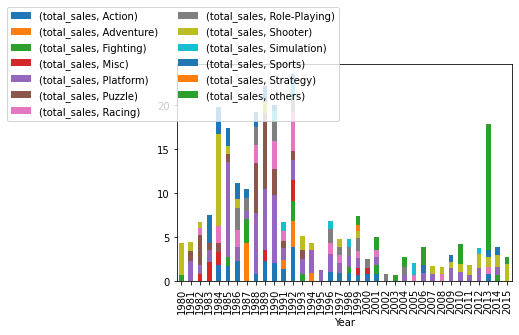

In [406]:
import seaborn as sns

z2.unstack().plot(kind = 'bar', stacked = True).legend(loc='right',  ncol=2, bbox_to_anchor=(0.5, 1))



In [ ]:
#시간되면 상관관계 수치화 하기 으ㅏ아아

In [410]:
df['Year'] = df['Year'].astype('int').apply(numeric)
df['Year']
df = df.sort_values(by=['Year'])
df
y1 = df['Total_Sales'] > 10
df3 = df[y1].groupby(by =['Year','Genre', 'Name']).sum()

df4 = pd.DataFrame(df3[['Total_Sales']])
df4

Total_Sales
Year Genre        Name                                                     
1984 Shooter      Duck Hunt                                           28.31
1985 Platform     Super Mario Bros.                                   40.24
1988 Platform     Super Mario Bros. 3                                 17.28
1989 Platform     Super Mario Land                                    18.14
     Puzzle       Tetris                                              30.26
1990 Platform     Super Mario World                                   20.62
1992 Adventure    Super Mario Land 2: 6 Golden Coins                  11.18
1993 Platform     Super Mario All-Stars                               10.55
1996 Platform     Super Mario 64                                      11.90
     Role-Playing Pokemon Red/Pokemon Blue                            31.38
1997 Racing       Gran Turismo                                        10.95
1998 Role-Playing Pokémon Yellow: Special Pikachu Edition             14.64
1999 Role-Playing Pokemon Gold/Pokemon Silver                         23.09
2001 Action       Grand Theft Auto III                                13.10
     Racing       Gran Turismo 3: A-Spec                              14.97
2002 Action       Grand Theft Auto: Vice City                         16.15
     Role-Playing Pokemon Ruby/Pokemon Sapphire                       15.84
2004 Action       Grand Theft Auto: San Andreas                       20.81
     Platform     Super Mario 64                                      10.42
     Racing       Gran Turismo 4                                      11.65
     Role-Playing Pokemon FireRed/Pokemon LeafGreen                   10.49
2005 Misc         Brain Age: Train Your Brain in Minutes a Day        20.22
     Puzzle       Brain Age 2: More Training in Minutes a Day         15.30
     Racing       Mario Kart DS                                       23.43
     Simulation   Animal Crossing: Wild World                         12.28
                  Nintendogs                                          24.75
2006 Misc         Wii Play                                            29.01
     Platform     New Super Mario Bros.                               30.01
     Role-Playing Pokemon Diamond/Pokemon Pearl                       18.35
     Sports       Wii Sports                                          82.74
2007 Platform     Super Mario Galaxy                                  11.52
     Shooter      Halo 3                                              12.14
     Sports       Wii Fit                                             22.72
2008 Action       Grand Theft Auto IV                                 21.61
     Fighting     Super Smash Bros. Brawl                             13.04
     Racing       Mario Kart Wii                                      35.83
2009 Action       Pokemon HeartGold/Pokemon SoulSilver                11.90
     Platform     New Super Mario Bros. Wii                           28.61
     Shooter      Call of Duty: Modern Warfare 2                      24.21
     Sports       Wii Fit Plus                                        22.00
                  Wii Sports Resort                                   33.00
2010 Misc         Kinect Adventures!                                  21.82
     Racing       Gran Turismo 5                                      10.77
     Role-Playing Pokemon Black/Pokemon White                         15.32
     Shooter      Call of Duty: Black Ops                             27.37
2011 Misc         Just Dance 3                                        10.27
     Platform     Super Mario 3D Land                                 10.79
     Racing       Mario Kart 7                                        12.21
     Shooter      Call of Duty: Modern Warfare 3                      28.23
2012 Shooter      Call of Duty: Black Ops II                          27.78
2013 Action       Grand Theft Auto V                                  37.77
     Shooter      Call of Duty: Ghos

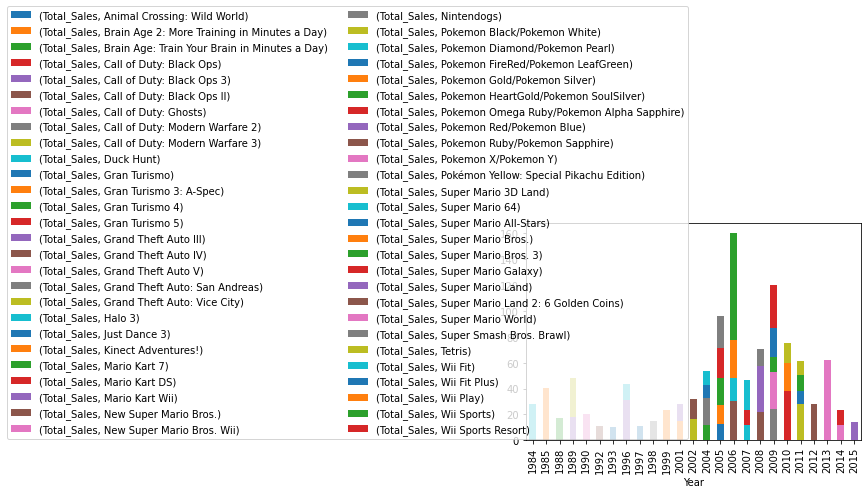

In [407]:
df4.unstack().plot(kind = 'bar', stacked = True).legend(loc='right',  ncol=2, bbox_to_anchor=(0.5, 1))

In [375]:
#출고량 높은 게임에대한 분석 및 시각화 프로세스
df_q3 = df[['Platform','Year','Genre', 'NA_Sales', 'EU_Sales','JP_Sales','Other_Sales']]

df_q3 = df_q3[df.Year != 0]
df_q3['Year'] = df_q3['Year'].astype('int').apply(numeric)
df_q3['Year']
df_q3 = df_q3.sort_values(by=['Year'])
df_q3['total_sales'] = df_q3['NA_Sales']+df_q3['EU_Sales']+df_q3['JP_Sales']+df_q3['Other_Sales']

df_q33 = df_q3[['Year','Genre','Platform','total_sales']]
df_q33['Platform']

x = df_q33.groupby(['Year', 'Genre', 'Platform']).sum()
x1 = x['total_sales'] > 20
x2[x1]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


total_sales
Year Genre        Platform             
1984 Shooter      NES             31.10
1985 Platform     NES             43.17
1988 Platform     NES             26.30
1989 Puzzle       GB              37.54
1990 Platform     SNES            20.62
...                                 ...
2014 Role-Playing 3DS             24.38
     Shooter      PS4             21.32
2015 Action       PS4             29.35
     Shooter      PS4             32.09
                  XOne            23.00

[104 rows x 1 columns]

In [ ]:
z